# 机器学习之AGNES算法

#### 【简介】

**层次聚类**方法对给定的数据集进行层次的分解，直到某种条件满足为止。具体又可分为**凝聚**的层次聚类和**分裂**的层次聚类两种。

**层次凝聚**的代表是**AGNES**(AGglomerative NESting)算法。AGNES算法**最初将每个对象作为一个簇**，然后这些簇根据某些准则被**一步步地合并**。两个簇间的**相似度**有多种不同的计算方法。聚类的合并过程反复进行直到所有的对象最终满足簇数目。

#### 【目录】

1. [距离的计算](#1.-距离的计算)
2. [AGNES算法的流程](#2.-AGNES算法流程)
3. [红酒聚类](#3.-红酒聚类)

## 1. 距离的计算

### 任务描述

根据本关所学知识，完成`calc_min_dist`函数，`calc_max_dist`函数以及`calc_avg_dist`函数分别实现计算两个簇之间的**最短距离**、**最远距离**和**平均距离**。

### 相关知识

为了完成本任务，需要掌握：

- 为什么需要距离
- 距离的计算

#### 为什么需要距离

**AGNES**算法是一种**自底向上聚合**的**层次聚类**算法，它先会将数据集中的每个样本看作一个初始簇，然后在算法运行的每一步中找出距离最近的两个簇进行合并，直至达到预设的簇的数量。所以AGNES算法需要不断的**计算簇之间的距离**，这也符合聚类的核心思想（**物以类聚，人以群分**），因此怎样度量两个簇之间的距离成为了关键。

#### 距离的计算

衡量两个簇之间的距离通常分为**最小距离**、**最大距离**和**平均距离**。在AGNES算法中可根据具体业务选择其中一种距离作为度量标准。

##### 最小距离

**最小距离**描述的是两个簇之间**距离最近**的两个样本所对应的距离。例如下图中圆圈和菱形分别代表两个簇，两个簇之间离得最近的样本的欧式距离为3.3，则最小距离为3.3。

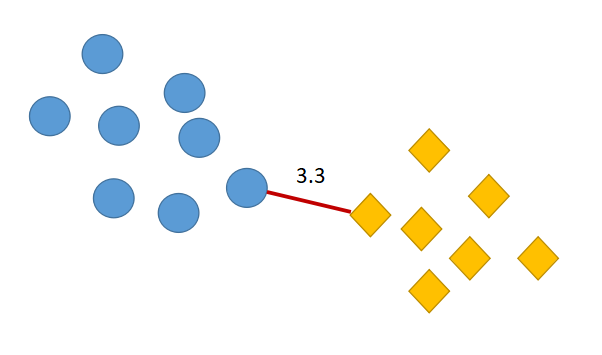

假设给定簇$C_i$与$C_j$，则最小距离为：

$$
d_{min} = \min_{{x \in i},{z \in j}}dist(x, z)
$$

##### 最大距离

**最大距离**描述的是两个簇之间**距离最远**的两个样本所对应的距离。例如下图中圆圈和菱形分别代表两个簇，两个簇之间离得最远的样本的欧式距离为23.3，则最大距离为23.3。

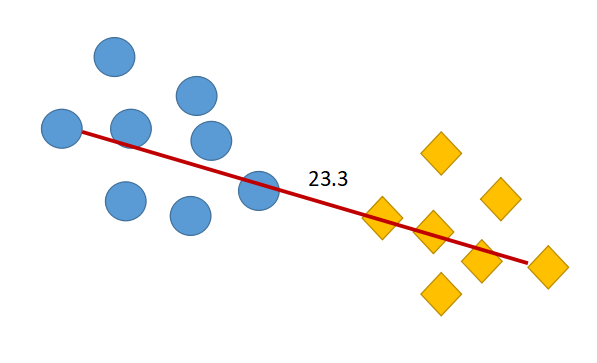

假设给定簇$C_i$与$C_j$，则最小距离为：

$$
d_{min} = \max_{{x \in i},{z \in j}}dist(x, z)
$$

##### 平均距离

**平均距离**描述的是两个簇之间**样本的平均距离**。例如下图中圆圈和菱形分别代表两个簇，计算两个簇之间的所有样本之间的欧式距离并求其平均值。

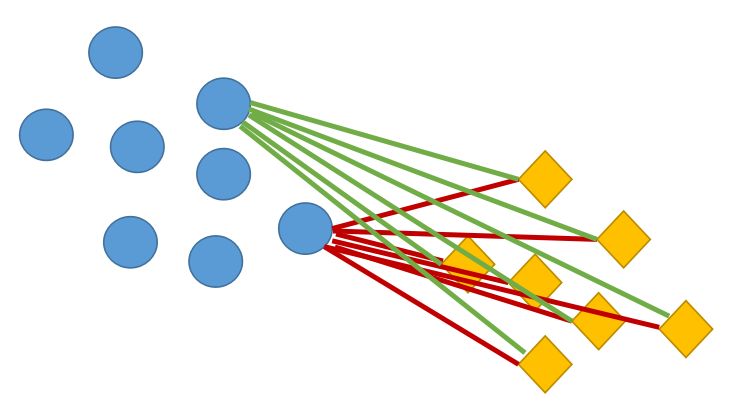

假设给定簇$C_i$与$C_j$，$|C_i|$,$|C_j|$分别表示簇$i$与簇$j$中样本的数量，则平均距离为：

$$
d_{min} = \frac{1}{|C_i||C_j|} \sum_{x \in i} \sum_{z \in j} dist(x, z)
$$

### 实操练习

#### 编程要求

根据提示，补充Begin-End区域的代码，完成`clac_min_dist`函数，`calc_max_dist`函数以及`calc_avg_dist`函数分别实现计算两个簇之间的**最短距离**、**最远距离**和**平均距离**。注意：距离请使用**欧氏距离**。

`calc_min_dist`函数中的参数:

- `cluster1`：簇1中的样本数据，类型为`ndarray`
- `cluster2`：簇2中的样本数据，类型为`ndarray`

`calc_max_dist`函数中的参数:

- `cluster1`：簇1中的样本数据，类型为`ndarray`
- `cluster2`：簇2中的样本数据，类型为`ndarray`

`calc_avg_dist`函数中的参数:

- `cluster1`：簇1中的样本数据，类型为`ndarray`
- `cluster2`：簇2中的样本数据，类型为`ndarray`

#### 测试说明

测试输入：`{'cluster1':[[0, 1, 0], [1, 0, 1], [1, 2, 3.2], [0, 0, 1.2], [1, 1, 0.1]], 'cluster2':[[10.1, 20.3, 9], [8.2, 15.3, 11]]}`

预期输出：`[17.016756, 23.977906, 21.133420]`

In [1]:
import numpy as np
def calc_min_dist(cluster1, cluster2):
    '''
    计算簇间最小距离
    :param cluster1:簇1中的样本数据，类型为ndarray
    :param cluster2:簇2中的样本数据，类型为ndarray
    :return:簇1与簇2之间的最小距离
    '''
    #********* Begin *********#
    min_dist = np.inf
    for i in range(len(cluster1)):
        for j in range(len(cluster2)):
            dist = np.sqrt(np.sum(np.square(cluster1[i] - cluster2[j])))
            if dist < min_dist:
                min_dist = dist
    return min_dist
    #********* End *********#
def calc_max_dist(cluster1, cluster2):
    '''
    计算簇间最大距离
    :param cluster1:簇1中的样本数据，类型为ndarray
    :param cluster2:簇2中的样本数据，类型为ndarray
    :return:簇1与簇2之间的最大距离
    '''
    #********* Begin *********#
    max_dist = 0
    for i in range(len(cluster1)):
        for j in range(len(cluster2)):
            dist = np.sqrt(np.sum(np.square(cluster1[i] - cluster2[j])))
            if dist > max_dist:
                max_dist = dist
    return max_dist
    #********* End *********#
def calc_avg_dist(cluster1, cluster2):
    '''
    计算簇间平均距离
    :param cluster1:簇1中的样本数据，类型为ndarray
    :param cluster2:簇2中的样本数据，类型为ndarray
    :return:簇1与簇2之间的平均距离
    '''
    #********* Begin *********#
    total_sample = len(cluster1)*len(cluster2)
    total_dist = 0
    for i in range(len(cluster1)):
        for j in range(len(cluster2)):
            total_dist += np.sqrt(np.sum(np.square(cluster1[i] - cluster2[j])))
    return total_dist/total_sample
    #********* End *********#

In [4]:
# 测试代码

input_data = {
    'cluster1':[[0, 1, 0], [1, 0, 1], [1, 2, 3.2], [0, 0, 1.2], [1, 1, 0.1]], 
    'cluster2':[[10.1, 20.3, 9], [8.2, 15.3, 11]]
}

min_dist = calc_min_dist(np.array(input_data['cluster1']), 
                         np.array(input_data['cluster2']))
max_dist = calc_max_dist(np.array(input_data['cluster1']), 
                         np.array(input_data['cluster2']))
avg_dist = calc_avg_dist(np.array(input_data['cluster1']), 
                         np.array(input_data['cluster2']))

print([min_dist, max_dist, avg_dist])

[17.016756447690025, 23.977906497440514, 21.133420328062666]


## 2. AGNES算法流程

### 任务描述

补充python代码，完成AGNES函数实现层次聚类功能。

### 相关知识

为了完成本任务，需要掌握AGNES算法流程

#### AGNES算法流程

**AGNES**算法是一种**自底向上**聚合的**层次聚类**算法，它先会将数据集中的每个样本看作一个初始簇，然后在算法运行的每一步中**找出距离最近**的两个簇进行**合并**，直至达到预设的簇的数量。

举个例子，现在先要将西瓜数据聚成两类，数据如下表所示：

| 编号 | 体积 | 重量 |
|:-- |:-- |:-- |
| 1 | 1.2 | 2.3 |
| 2 | 3.6 | 7.1 |
| 3 | 1.1 | 2.2 |
| 4 | 3.5 | 6.9 |
| 5 | 1.5 | 2.5 |

一开始，每个样本都看成是一个簇(`1`号样本看成是`1`号簇，`2`号样本看成是`2`号簇，…，`5`号样本看成是`5`号簇)，假设簇的集合为C=`[[1], [2], [3], [4], [5]]`。

假设使用簇间最小距离来度量两个簇之间的远近，从表中可以看出`1`号簇与`3`号簇的簇间最小距离最小。因此需要将`1`号簇和`3`号簇合并，那么此时簇的集合`C=[[1, 3], [2], [4], [5]]`。

然后继续看这`4`个簇中哪两个簇之间的最小距离最小，我们发现`2`号簇与`4`号簇的最小距离最小，因此我们要进行合并，合并之后`C=[[1, 3], [2, 4], [5]]`。

然后继续看这`3`个簇中哪两个簇之间的最小距离最小，我们发现`5`号簇与`[1, 3]`簇的最小距离最小，因此我们要进行合并，合并之后`C=[[1, 3, 5], [2, 4]]`。

这个时候`C`中只有两个簇了，达到了我们的预期目标（想要聚成两类），所以算法停止。算法停止后会发现，我们已经将`5`个西瓜，聚成了两类，一类是小西瓜，另一类是大西瓜。

如果将整个聚类过程中的合并，与合并的次序可视化出来，就能看出为什么说AGNES是自底向上的层次聚类算法了。

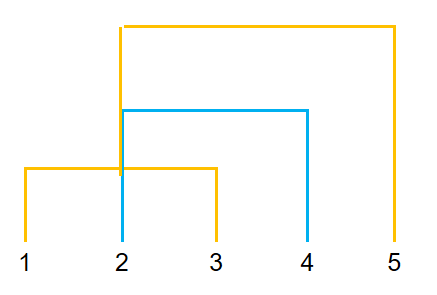

AGNES伪代码如下：

### 实操练习

#### 编程要求

在Begin-End区域完成AGNES函数实现聚类功能，并将聚类结果返回(量化距离时请使用簇间最大欧氏距离)。

其中：

- `feature`：数据集，类型为`ndarray`
- `k`：表示想要将数据聚成`k`类，类型为`int`

#### 测试说明

测试输入：`[[1.2, 2.3], [3.6, 7.1], [1.1, 2.2], [3.5, 6.9], [1.5, 2.5]]`

预期输出：`[0, 1, 0, 1, 0]`

In [4]:
import numpy as np

def AGNES(feature, k):
    '''
    AGNES聚类并返回聚类结果
    假设数据集为`[1, 2], [10, 11], [1, 3]]，那么聚类结果可能为`[[1, 2], [1, 3]], [[10, 11]]]
    :param feature:训练数据集所有特征组成的ndarray
    :param k:表示想要将数据聚成`k`类，类型为`int`
    :return:聚类结果
    '''
    #********* Begin *********#
    # 找到距离最小的下标
    def find_Min(M):
        min = np.inf
        x = 0;
        y = 0
        for i in range(len(M)):
            for j in range(len(M[i])):
                if i != j and M[i][j] < min:
                    min = M[i][j];
                    x = i;
                    y = j
        return (x, y, min)
    #计算簇间最大距离
    def calc_max_dist(cluster1, cluster2):
        max_dist = 0
        for i in range(len(cluster1)):
            for j in range(len(cluster2)):
                dist = np.sqrt(np.sum(np.square(cluster1[i] - cluster2[j])))
                if dist > max_dist:
                    max_dist = dist
        return max_dist
    #初始化C和M
    C = []
    M = []
    for i in feature:
        Ci = []
        Ci.append(i)
        C.append(Ci)
    for i in C:
        Mi = []
        for j in C:
            Mi.append(calc_max_dist(i, j))
        M.append(Mi)
    q = len(feature)
    #合并更新
    while q > k:
        x, y, min = find_Min(M)
        C[x].extend(C[y])
        C.pop(y)
        M = []
        for i in C:
            Mi = []
            for j in C:
                Mi.append(calc_max_dist(i, j))
            M.append(Mi)
        q -= 1
    return C
    #********* End *********#

In [107]:
# 测试代码
input_data = [[1.2, 2.3], [3.6, 7.1], [1.1, 2.2], [3.5, 6.9], [1.5, 2.5]]

pred = AGNES(np.array(input_data), k=2)
pred

[[array([1.2, 2.3]), array([1.1, 2.2]), array([1.5, 2.5])],
 [array([3.6, 7.1]), array([3.5, 6.9])]]

In [110]:
# 将层次分类的结果转换为列表
def to_list(arr):
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            arr[i][j] = list(arr[i][j])
    return arr

In [111]:
pred = to_list(pred)

In [117]:
# 返回指定特征的预测分类标签
def get_pred_label(x, pred):
    label = -1
    for i in range(len(pred)):
        if x in pred[i]:
            label = i
    return label

In [118]:
pred_labels = list(map(lambda x: get_pred_label(x, pred), input_data))
pred_labels

[0, 1, 0, 1, 0]

## 3. 红酒聚类

### 任务描述

`sklearn`中的`AgglomerativeClustering`类实现了AGNES算法，本任务要求使用`sklearn`中`AgglomerativeClustering`来对红酒数据进行聚类。

### 相关知识

为了完成本任务，需要掌握：AgglomerativeClustering

#### 数据集介绍

数据集为一份**红酒数据**，一共有178个样本，每个样本有13个特征，这里不会提供红酒的标签，需要自己根据这13个特征对红酒进行聚类。该数据集可通过sklearn.datasets中的load_wine()加载。

In [7]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head().T

,0,1,2,3,4
alcohol,14.23,13.20,13.16,14.37,13.24
malic_acid,1.71,1.78,2.36,1.95,2.59
ash,2.43,2.14,2.67,2.50,2.87
alcalinity_of_ash,15.60,11.20,18.60,16.80,21.00
magnesium,127.00,100.00,101.00,113.00,118.00
total_phenols,2.80,2.65,2.80,3.85,2.80
flavanoids,3.06,2.76,3.24,3.49,2.69
nonflavanoid_phenols,0.28,0.26,0.30,0.24,0.39
proanthocyanins,2.29,1.28,2.81,2.18,1.82
color_intensity,5.64,4.38,5.68,7.80,4.32


#### AgglomerativeClustering

`AgglomerativeClustering`的构造函数中有两个常用的参数可以设置：

- **`n_clusters`**：将数据聚成`n_clusters`个类
- **`linkage`**：设置AGNES聚类时使用最小簇间距离、最大簇间距离还是平均距离。传入`ward`表示最小簇间距离，传入`complete`表示最大簇间距离，传入`average`表示平均距离

`AgglomerativeClustering`类中的`fit_predict`函数用于训练模型并获取聚类结果，`fit_predict`函数有一个向量输入：

- **`X`**：数据集，形状为**`(样本数量,特征数量)`** 的`ndarray`

`AgglomerativeClustering`的使用代码如下：

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# 创建AGNES层次聚类模型
X = wine.data
agnes = AgglomerativeClustering(n_clusters=3)
# 拟合并进行无监督聚类（预测）
y_pred = agnes.fit_predict(X)
y_pred

### 实操练习

#### 编程要求

在`Begin-End`区域填写`Agglomerative_cluster(data)`函数完成红酒数据聚类任务，簇的数量为3。其中：

- `data`：数据样本，类型为`ndarray`，`shape=(样本数量, 特征数量)`
- `return`: 聚类结果，类型为`ndarray`

【注意】：直接使用原始数据进行聚类的效果可能不太理想，你可能需要对数据进行预处理。

【提示】：AGNES算法需要计算距离，想想什么样的预处理方式对依赖距离的算法有好的效果。

#### 测试说明

返回聚类结果，输出聚类后每个类别的吻合度，应高于0.9

In [119]:
from sklearn.cluster import AgglomerativeClustering

def Agglomerative_cluster(data):
    '''
    对红酒数据进行聚类
    :param data: 数据集，类型为ndarray
    :return: 聚类结果，类型为ndarray
    '''
    #********* Begin *********#
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    agnes = AgglomerativeClustering(n_clusters=3)
    result = agnes.fit_predict(data)
    return result
    #********* End *********#

In [120]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
# 加载数据
wine = load_wine()
X = wine.data
y = wine.target
# 拟合并进行无监督聚类（预测）
y_pred = Agglomerative_cluster(X)
# 评估打分

In [121]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [122]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

由于分类标签不同，导致聚类吻合度计算错误。现将标签统一化再进行评估打分。

In [123]:
y[y == 0] = -1
y[y == 1] = -2
y[y == 2] = -3
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3])

In [124]:
y_pred[y_pred == 2] = -1
y_pred[y_pred == 0] = -2
y_pred[y_pred == 1] = -3
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -2, -3, -3, -2, -2, -2, -1, -1, -2,
       -3, -2, -3, -1, -2, -1, -2, -2, -2, -3, -2, -2, -2, -2, -2, -3, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -3,
       -2, -2, -1, -2, -2, -2, -2, -2, -2, -2, -2, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3])

In [125]:
acc = accuracy_score(y, y_pred)
print('聚类的吻合度：{:.2f}'.format(acc))

聚类的吻合度：0.93
